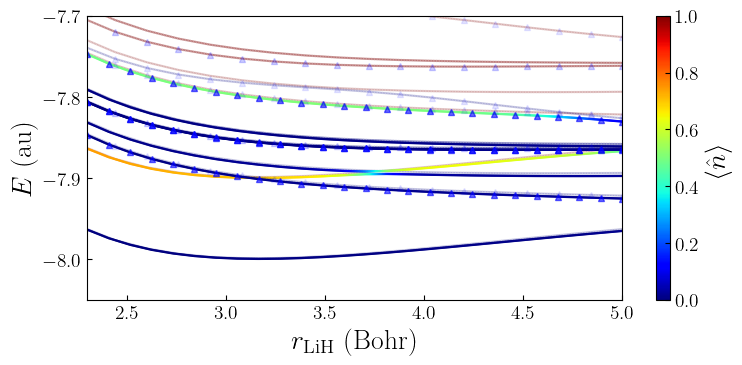

In [70]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap

from plot_utils import *

def plot_energy_vs_bond_length(filename, save_path):
    """
    Plot the energy vs. bond length of LiH with adjusted gist_rainbow coloring based on N values.

    Parameters:
    - filename (str): Path to the input file.
    - save_path (str): Path to save the plotted figure.
    """
    with open("lih-631g-fci.out", "r") as file:
        lines = file.readlines()
    data0 = numpy.array([list(map(float, line.split(","))) for line in lines[1:]])
    x0 = data0[:, 0]
    
    # Read the file and extract data
    with open(filename, 'r') as file:
        lines = file.readlines()
    data = numpy.array([list(map(float, line.split(","))) for line in lines[1:]])
    
    # Extract x values and y values
    x = data[:, 0]
    y_values = data[:, 1::2]
    
    # Extract legends
    all_legends = lines[0].split(",")
    all_legends = [legend.strip() for legend in all_legends]
    
    # Extract N values
    n_legends = [legend for legend in all_legends if "N" in legend]
    n_indices = [all_legends.index(legend) for legend in n_legends]
    filtered_n0_values = data0[:, n_indices]
    filtered_n1_values = data0[:, n_indices] + 1.0
    filtered_n_values = data[:, n_indices]
    
    # Extract energy legends and corresponding data
    energy_legends = [legend for legend in all_legends if "Energy" in legend]
    energy_indices = [all_legends.index(legend) for legend in energy_legends]
    filtered_y0_values = data0[:, energy_indices]
    filtered_y1_values = data0[:, energy_indices] + 0.1
    filtered_y_values = data[:, energy_indices]
    
    # Adjust the colormap and normalization based on the provided range
    norm = Normalize(vmin=0.0, vmax=1.0)
    colormap = plt.cm.jet

    fig, ax = plt.subplots(figsize=(8, 4))
    

    # Loop through all the energy levels and plot them
    for i in range(filtered_y_values.shape[1]):
        # Interpolate for smoother curves
        x_new = numpy.linspace(x.min(), x.max(), 500)  # For interpolation
        y_interp = numpy.interp(x_new, x, filtered_y_values[:, i])
        n_interp = numpy.interp(x_new, x, filtered_n_values[:, i])
        
        # Plot continuous line
        marker = "^" if "T" in energy_legends[i] else "none"
        ax.plot(x, filtered_y_values[:, i], linestyle="none", color='blue', alpha=0.6, label=None, marker=marker, markersize=4)
        
        # Scatter for coloring based on N values
        ax.scatter(x_new, y_interp, c=n_interp, s=3, cmap=colormap, norm=norm, edgecolor='none')
        
        # Interpolate for smoother curves
        x_new = numpy.linspace(x0.min(), x0.max(), 500)  # For interpolation
        y_interp = numpy.interp(x_new, x0, filtered_y0_values[:, i])
        n_interp = numpy.interp(x_new, x0, filtered_n0_values[:, i])
        
        ax.plot(x0, filtered_y0_values[:, i], linestyle="none", color='blue', alpha=0.1, label=None, marker=marker, markersize=4)
        
        # Scatter for coloring based on N values
        ax.scatter(x_new, y_interp, c=n_interp, s=3, cmap=colormap, norm=norm, edgecolor='none', alpha=0.2)
        
            # Interpolate for smoother curves
        y_interp = numpy.interp(x_new, x0, filtered_y1_values[:, i])
        n_interp = numpy.interp(x_new, x0, filtered_n1_values[:, i])
        
        ax.plot(x0, filtered_y1_values[:, i], linestyle="none", color='blue', alpha=0.1, label=None, marker=marker, markersize=4)
        
        # Scatter for coloring based on N values
        ax.scatter(x_new, y_interp, c=n_interp, s=3, cmap=colormap, norm=norm, edgecolor='none', alpha=0.2)

    # Add colorbar
    cbar = fig.colorbar(ax.collections[0], ax=ax)
    cbar.set_label(r'$\langle \hat{n} \rangle$')

    ax.set_xlim(2.3, 5.0)
    ax.set_ylim(-8.05, -7.70)
    ax.set_xlabel(r"$r_{\mathrm{LiH}}$ (Bohr)")
    ax.set_ylabel(r"$E$ (au)")
    ax.grid(False)
    plt.tight_layout()
    
    plt.savefig(save_path)
    plt.show()

plot_energy_vs_bond_length("lih-631g-0.0020.out", "/Users/yangjunjie/Downloads/lih-631g-0.0020.pdf")
# Test the function with the provided file and save path
# plot_energy_vs_bond_length("lih-631g-0.0050.out", "/Users/yangjunjie/Downloads/lih-631g-0.0050.pdf")

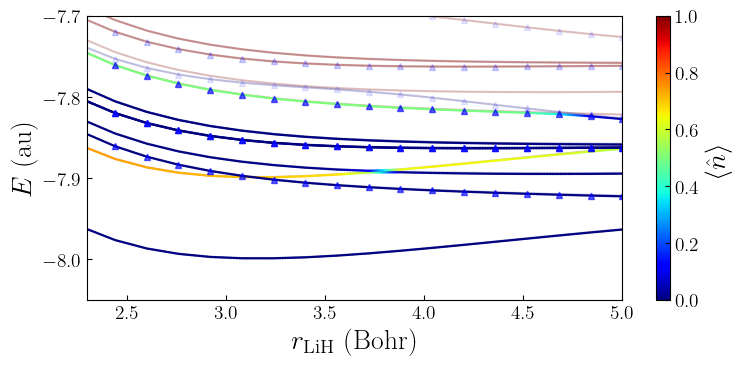

In [71]:
plot_energy_vs_bond_length("lih-631g-0.0010.out", "/Users/yangjunjie/Downloads/lih-631g-0.0010.pdf")

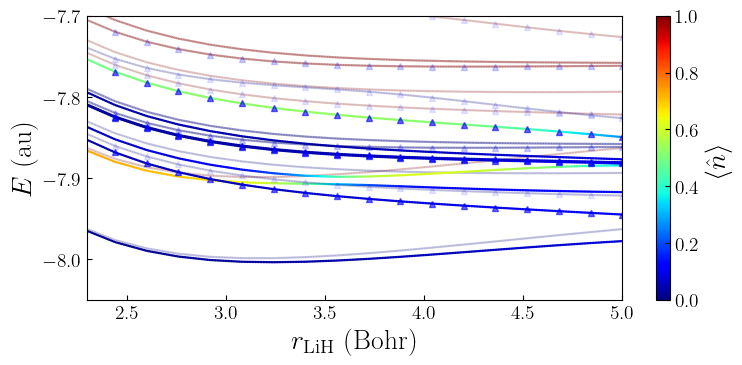

In [72]:
plot_energy_vs_bond_length("lih-631g-0.0050.out", "/Users/yangjunjie/Downloads/lih-631g-0.0050.pdf")
